# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


### 1. Generate 10 policies and 1000 scenarios and evaluate them

In [1]:
from lakemodel_function import lake_problem
from ema_workbench import (RealParameter, ScalarOutcome, Constant,Model)

from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments)
ema_logging.log_to_stderr(ema_logging.INFO)

#instantiate the model
model = Model('lakeproblem', function=lake_problem)

#specify uncertainties
model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2.0, 4.5),
                       RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
model.levers = [RealParameter('l' + str(i), 0, 0.1) for i in 
                     range(100)] 

#specify outcomes 
model.outcomes = [ScalarOutcome('max_P'),
                  ScalarOutcome('utility'),
                  ScalarOutcome('inertia'),
                  ScalarOutcome('reliability')]

with MultiprocessingEvaluator(model, n_processes=7) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=10)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


[MainProcess/INFO] no time dimension found in results


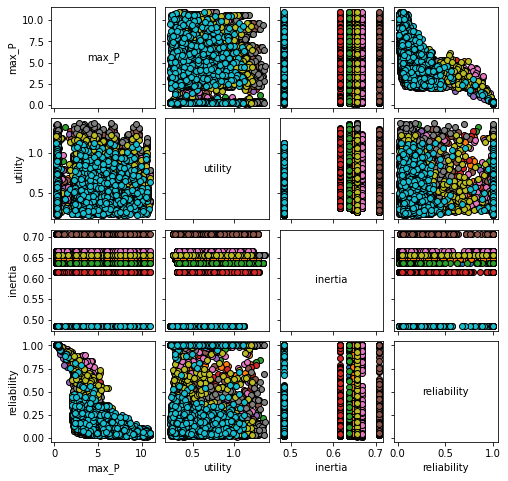

In [4]:
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt

results = experiments, outcomes 

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
plt.show()

### 2. Remove the 100 decision levers columns from the experiment array

In [3]:
#Removing the 100 decision variables
 
experiments
new_experiments = experiments.drop(['l'+ str(i) for i in 
                  range (0,100)], axis=1)
new_experiments

,b,delta,mean,q,stdev,scenario,policy,model
0,0.226864,0.933827,0.028546,4.240152,0.001297,0,0,lakeproblem
1,0.222470,0.966397,0.032402,4.097941,0.002296,1,0,lakeproblem
2,0.423322,0.982005,0.016470,2.669415,0.001812,2,0,lakeproblem
3,0.259547,0.973673,0.041720,2.832739,0.001333,3,0,lakeproblem
4,0.293329,0.937468,0.041348,3.348304,0.002312,4,0,lakeproblem
5,0.166088,0.965015,0.045398,2.819638,0.001838,5,0,lakeproblem
6,0.201283,0.936679,0.016286,2.546792,0.002108,6,0,lakeproblem
7,0.308981,0.939970,0.015963,3.222865,0.003641,7,0,lakeproblem
8,0.399474,0.960856,0.012788,2.755535,0.001820,8,0,lakeproblem
9,0.228585,0.989201,0.043945,3.164166,0.002381,9,0,lakeproblem


### 3. Apply scenario 

In [5]:
from ema_workbench.analysis import prim

x = new_experiments
y = outcomes['reliability'] < 0.1
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 10000 points remaining, containing 3217 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.064, coverage: 0.19894311470313958, density: 1.0 restricted_dimensions: 4


coverage     0.45042
density     0.959603
id                36
mass           0.151
mean        0.959603
res_dim            3
Name: 36, dtype: object

        box 36                                           
           min       max                        qp values
b     0.100048  0.223888          [-1.0, 1.23117065e-315]
q     2.000422  3.197003  [-1.0, 1.2042485443726016e-149]
mean  0.014410  0.049998    [0.0002637208828367814, -1.0]



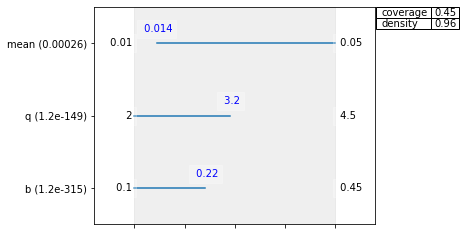

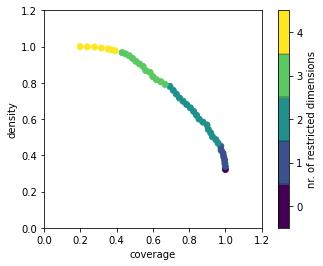

In [6]:
box1.inspect(36)
box1.inspect(36, style='graph')
plt.show()

box1.show_tradeoff()
plt.show()

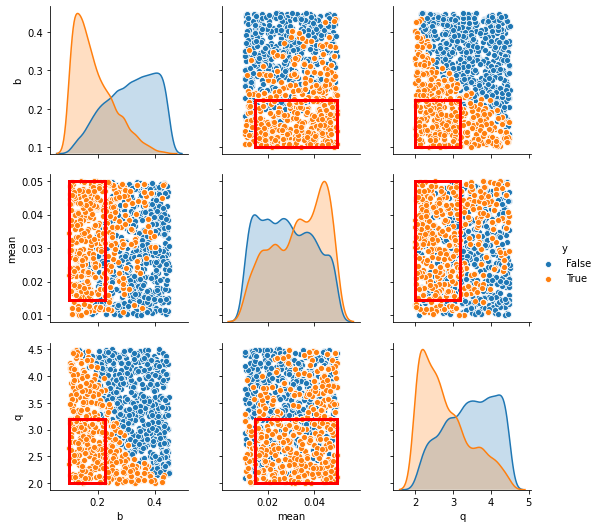

In [7]:
box1.show_pairs_scatter(36)
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category


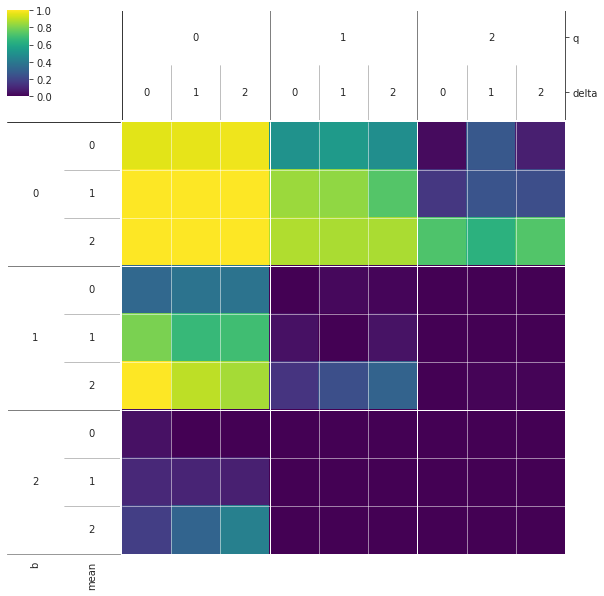

In [8]:

from ema_workbench.analysis import dimensional_stacking

x = new_experiments
y = outcomes['reliability'] <0.1
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

# From the scenario discovery it can be seen that at lower values of b and q, the concentration of cases of interest are peaked up. 
# This is reflected similarly in dimensional stackinng visualization, that when the values of b and q both are 0/lower, 
# there is higher concentration of cases indicated by the bright yellow colour